# コンピュータと音楽：松原担当分第6回

## 今日の目標
- 前回の課題のおさらい
- $n$-gramについて
- 楽曲分析の続き

## $n$-gram
https://en.wikipedia.org/wiki/N-gram


In [1]:
import nltk as nlp

notes = list('cdecdegedcded')
result = nlp.ngrams(notes, 2)
fdist = nlp.FreqDist(result)
fdist

FreqDist({('c', 'd'): 3,
          ('d', 'c'): 1,
          ('d', 'e'): 3,
          ('e', 'c'): 1,
          ('e', 'd'): 2,
          ('e', 'g'): 1,
          ('g', 'e'): 1})

## $n$-gramを用いて楽曲分析


In [2]:
import music21 as m21
url = 'http://kern.ccarh.org/cgi-bin/ksdata?l=cc/bach/cello&file=bwv1007-01.krn&f=xml'
bwv1007 = m21.converter.parse(url)
bwv1007.measures(1,2).show()

In [3]:
# measures(start,end)で特定の小節を抜き出せる
# show('text')でテキスト形式で表示可能
bwv1007.measures(1,2).show('text')

{0.0} <music21.stream.Part cello>
    {0.0} <music21.instrument.Instrument P1: cello: >
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.key.KeySignature of 1 sharp>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note G>
        {0.25} <music21.note.Note D>
        {0.5} <music21.note.Note B>
        {0.75} <music21.note.Note A>
        {1.0} <music21.note.Note B>
        {1.25} <music21.note.Note D>
        {1.5} <music21.note.Note B>
        {1.75} <music21.note.Note D>
        {2.0} <music21.note.Note G>
        {2.25} <music21.note.Note D>
        {2.5} <music21.note.Note B>
        {2.75} <music21.note.Note A>
        {3.0} <music21.note.Note B>
        {3.25} <music21.note.Note D>
        {3.5} <music21.note.Note B>
        {3.75} <music21.note.Note D>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note G>
        {0.25} <music21.note.Note E>
        {0.5} <music2

In [4]:
# notesでNote.Note型のものだけを抜き出す
bwv1007.measures(1,2).recurse().notes.show('text')

{0.0} <music21.note.Note G>
{0.25} <music21.note.Note D>
{0.5} <music21.note.Note B>
{0.75} <music21.note.Note A>
{1.0} <music21.note.Note B>
{1.25} <music21.note.Note D>
{1.5} <music21.note.Note B>
{1.75} <music21.note.Note D>
{2.0} <music21.note.Note G>
{2.25} <music21.note.Note D>
{2.5} <music21.note.Note B>
{2.75} <music21.note.Note A>
{3.0} <music21.note.Note B>
{3.25} <music21.note.Note D>
{3.5} <music21.note.Note B>
{3.75} <music21.note.Note D>
{4.0} <music21.note.Note G>
{4.25} <music21.note.Note E>
{4.5} <music21.note.Note C>
{4.75} <music21.note.Note B>
{5.0} <music21.note.Note C>
{5.25} <music21.note.Note E>
{5.5} <music21.note.Note C>
{5.75} <music21.note.Note E>
{6.0} <music21.note.Note G>
{6.25} <music21.note.Note E>
{6.5} <music21.note.Note C>
{6.75} <music21.note.Note B>
{7.0} <music21.note.Note C>
{7.25} <music21.note.Note E>
{7.5} <music21.note.Note C>
{7.75} <music21.note.Note E>


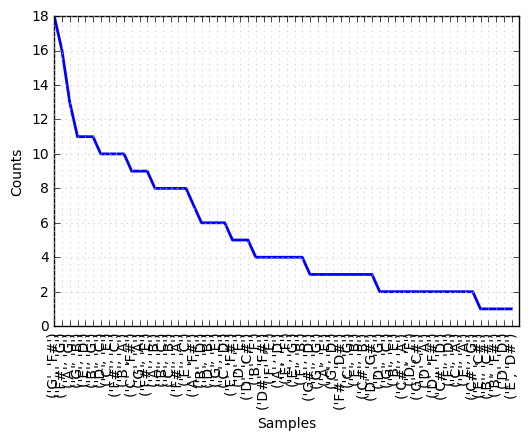

In [5]:
# 音高のbigram頻度をプロット

import nltk as nlp

note_list = bwv1007.measures(1,20).recurse().notes
pc_array = []
for note in note_list:
    pc_array.append(note.pitch.name)

result = nlp.ngrams(pc_array, 2)
fdist = nlp.FreqDist(result)
fdist.plot()

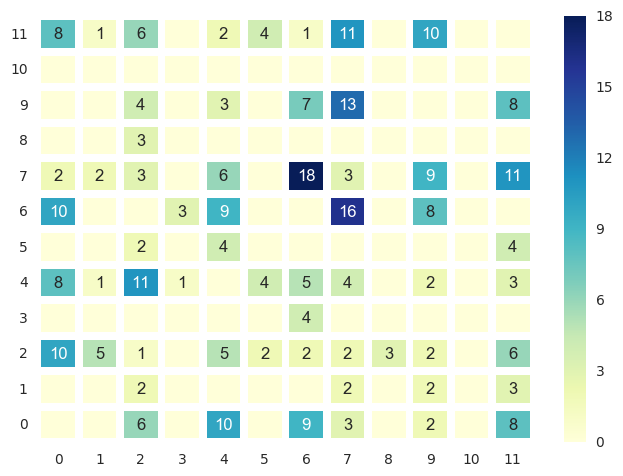

In [6]:
import seaborn as sns
import numpy as np

note_list = bwv1007.measures(1,20).recurse().notes
pc_array = []
for note in note_list:
    pc_array.append(note.pitch.pitchClass)

result = nlp.ngrams(pc_array, 2)
fdist = nlp.FreqDist(result)

# numpy moduleを用いて12×12のゼロ行列を作成
pc_matrix = np.zeros([12,12])

for key, value in fdist.items():
    pc_matrix[key[0]][key[1]] = value

    
ax = sns.heatmap(pc_matrix, linewidths=5, cmap="YlGnBu")

# 0以外の値を表示させる
ax = sns.heatmap(pc_matrix, mask=pc_matrix == 0, linewidths=5, annot=True, cmap="YlGnBu", cbar=False)

ax.invert_yaxis()
sns.plt.yticks(rotation=0)
sns.plt.show()

## 本日の課題
ねらい：music21モジュールの理解と最終自由課題に向けた楽曲分析のアイディアを練るため

内容：
music21のUser's Guide の二つのExampleを試して挙動を理解する。  
http://web.mit.edu/music21/doc/index.html

- Chapter 10. Examples 1: 主和音の次のコードは何か？
- Chapter 20. Examples 2: ピカルディ終止がないバッハの曲はいくつあるか？  
（後半のGap Fill analysisはやらなくて良い）

Exampleを実行する際は必要に応じて、Chapter 1~22 を見ながら、メソッドの使用方法を確認していくこと。
